<a href="https://colab.research.google.com/github/Mahmamad-Rafi/Encryptix/blob/main/MOTOR_CYCLE_PRICE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

In [ ]:
bike_data = pd.read_csv('/content/R8. BIKE DETAILS.csv')

In [ ]:
# Check the head of the dataset
bike_data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
bike_data.shape

(1061, 7)

In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
bike_data.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

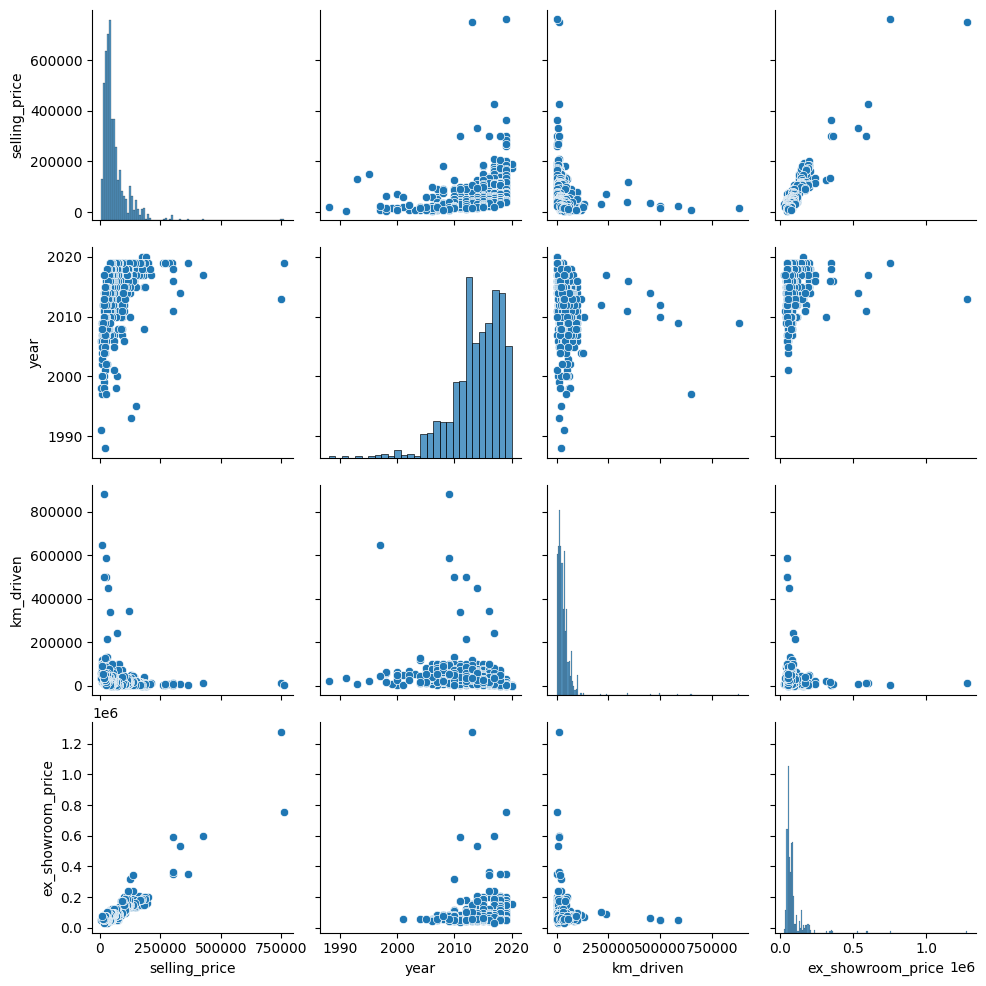

In [ ]:
sns.pairplot(bike_data, vars=['selling_price', 'year', 'km_driven', 'ex_showroom_price'])
plt.show()

In [ ]:
bike_data.dropna(inplace=True)

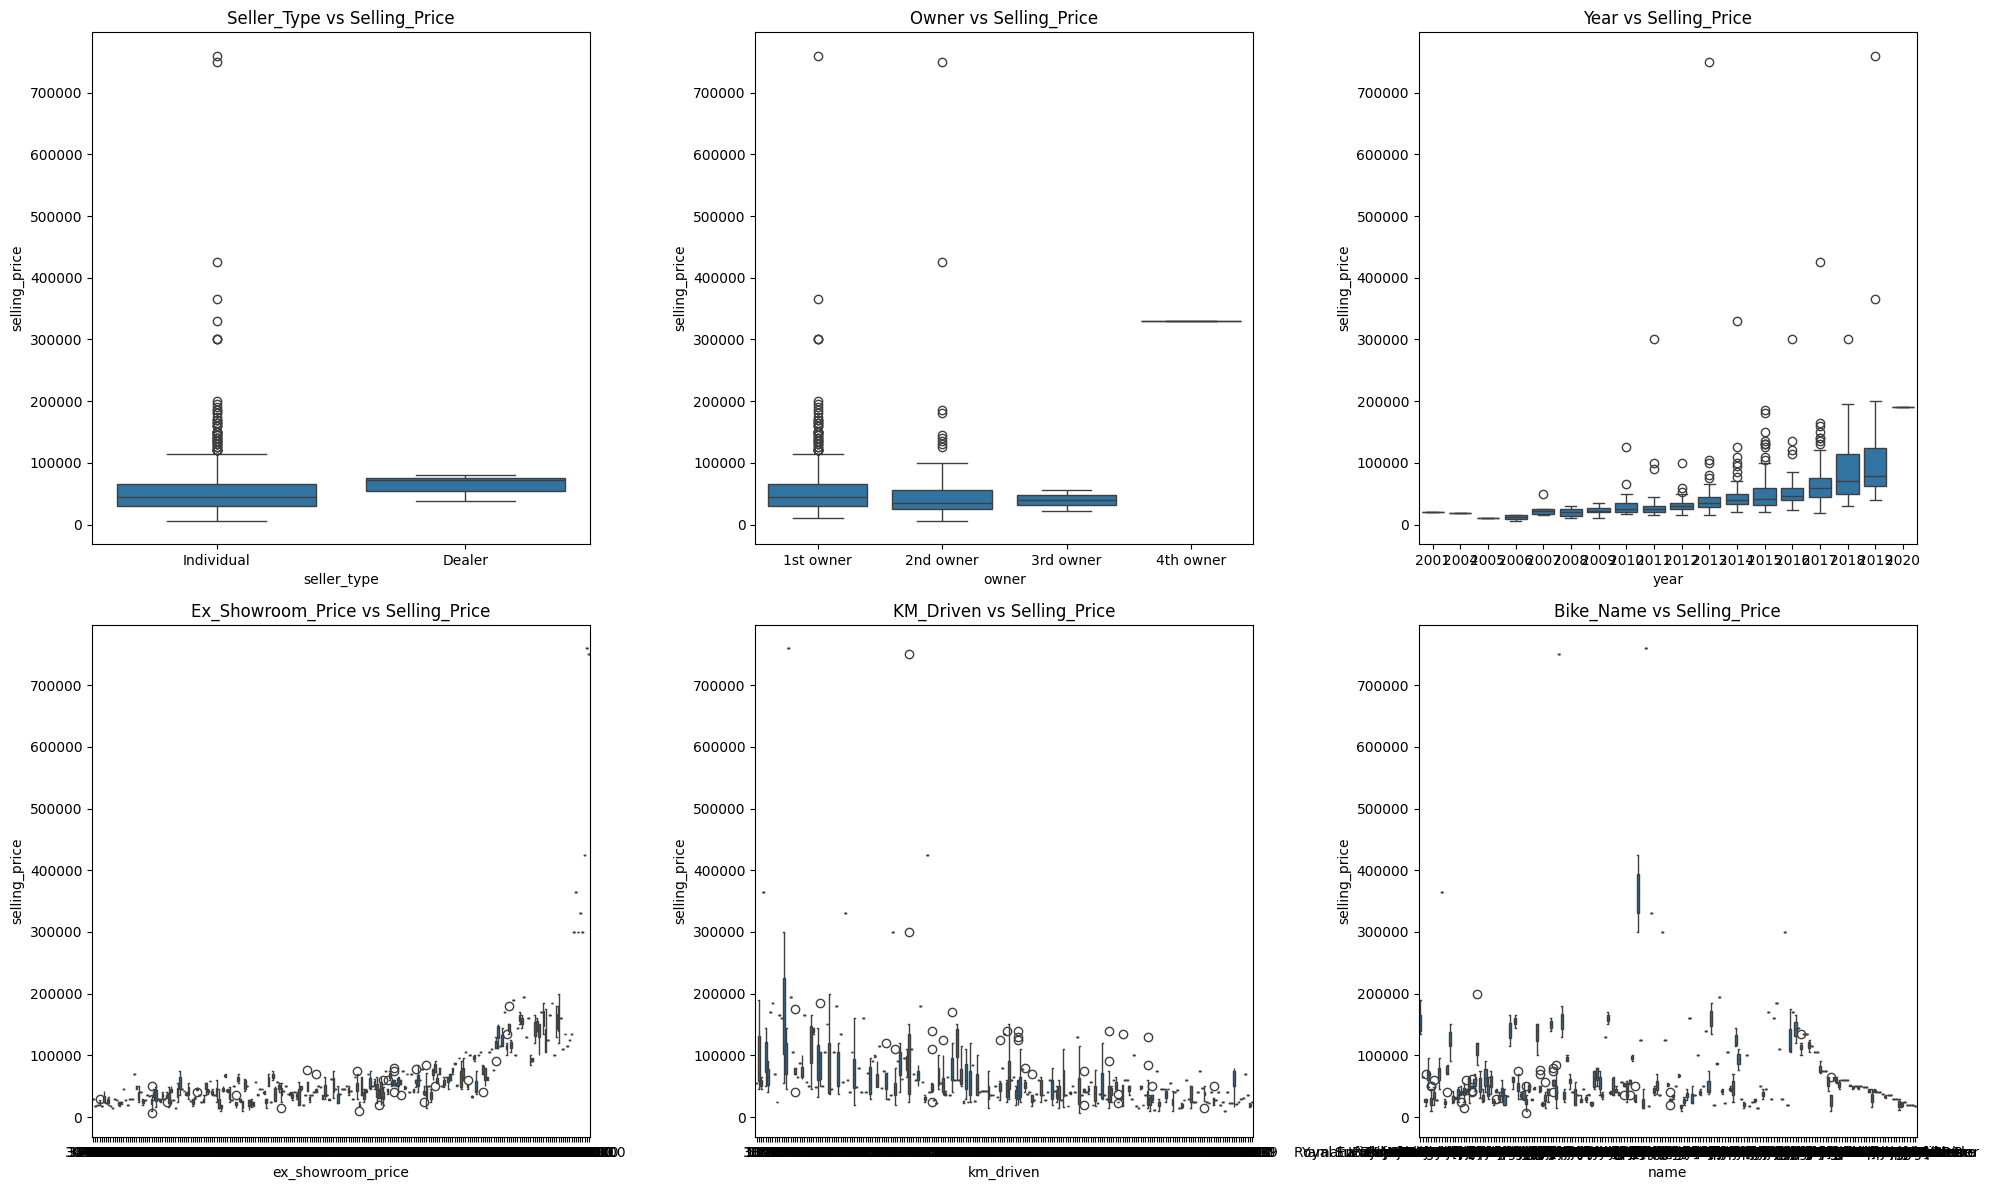

In [ ]:
plt.figure(figsize=(20, 12))

# Visualizing the impact of different features on the selling price
plt.subplot(2, 3, 1)
sns.boxplot(x='seller_type', y='selling_price', data=bike_data)
plt.title('Seller_Type vs Selling_Price')

plt.subplot(2, 3, 2)
sns.boxplot(x='owner', y='selling_price', data=bike_data)
plt.title('Owner vs Selling_Price')

plt.subplot(2, 3, 3)
sns.boxplot(x='year', y='selling_price', data=bike_data)
plt.title('Year vs Selling_Price')

plt.subplot(2, 3, 4)
sns.boxplot(x='ex_showroom_price', y='selling_price', data=bike_data)
plt.title('Ex_Showroom_Price vs Selling_Price')

plt.subplot(2, 3, 5)
sns.boxplot(x='km_driven', y='selling_price', data=bike_data)
plt.title('KM_Driven vs Selling_Price')

plt.subplot(2, 3, 6)
sns.boxplot(x='name', y='selling_price', data=bike_data)
plt.title('Bike_Name vs Selling_Price')

plt.tight_layout()
plt.show()


In [ ]:
bike_data = pd.get_dummies(bike_data, drop_first=True)

In [ ]:
X = bike_data.drop('selling_price', axis=1)
y = bike_data['selling_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Assuming y_test and y_pred are already defined

r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R^2 Score: -4921882807881056338837504.0000
RMSE: 178376755003833248.0000


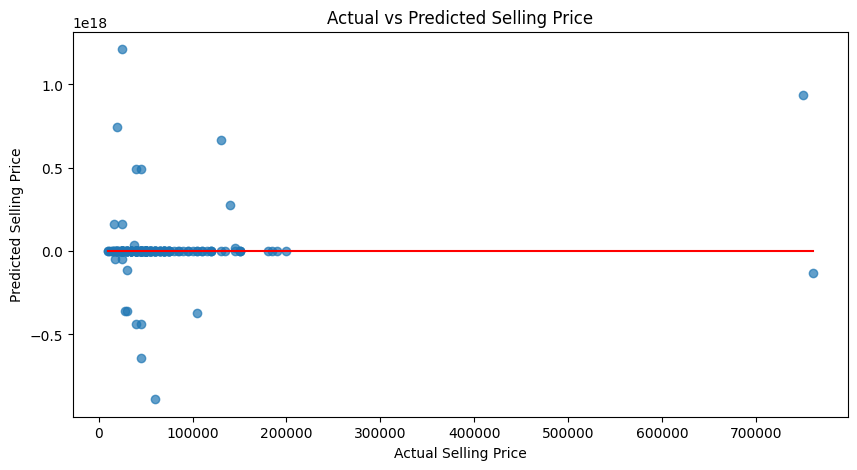

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()

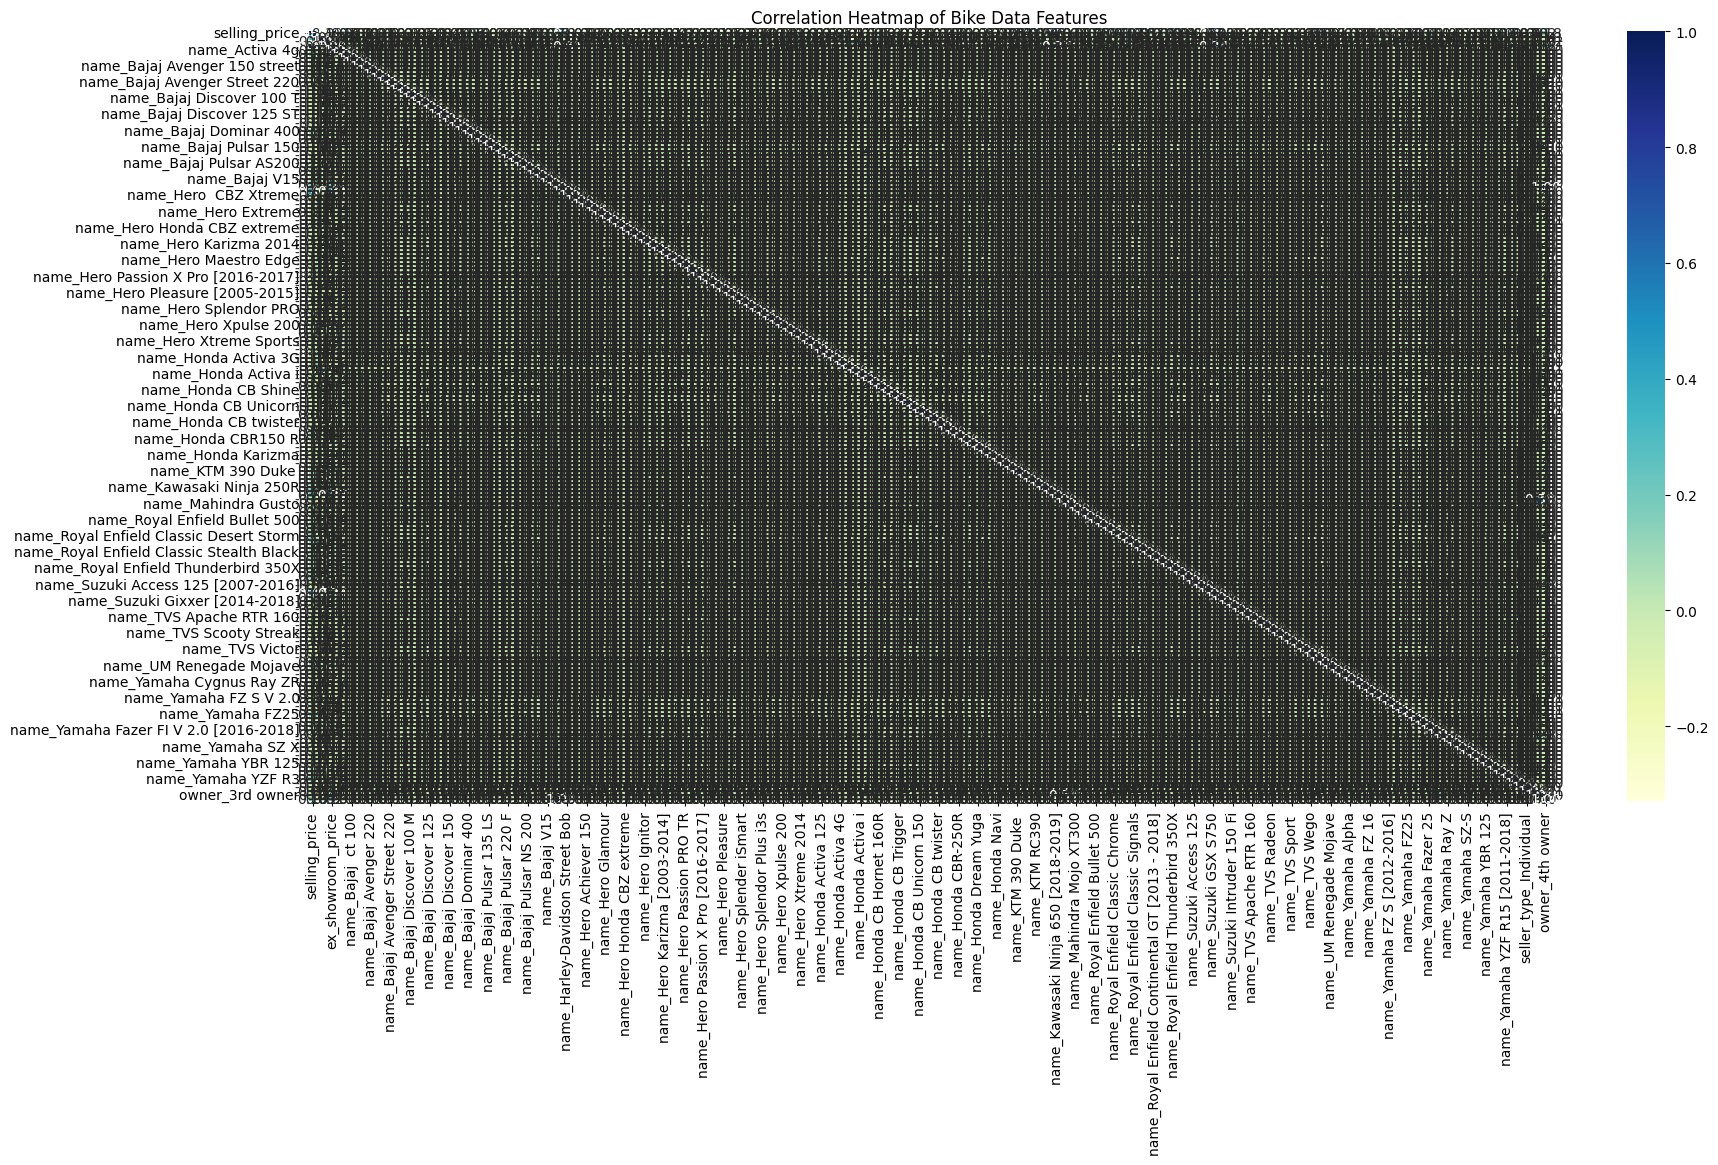

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(bike_data.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation Heatmap of Bike Data Features')
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

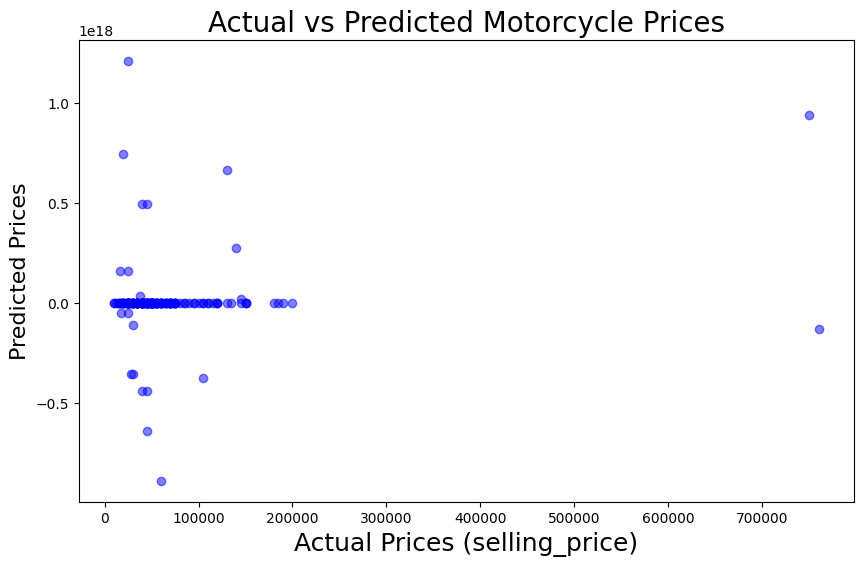

In [ ]:
import matplotlib.pyplot as plt

# Create a figure for plotting
fig = plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')

# Title and labels
plt.title('Actual vs Predicted Motorcycle Prices', fontsize=20)
plt.xlabel('Actual Prices (selling_price)', fontsize=18)
plt.ylabel('Predicted Prices', fontsize=16)

# Display the plot
plt.show()


In [ ]:
import statsmodels.api as sm

# Assuming X_train and y_train are already defined
X_train_sm = sm.add_constant(X_train)  # Add constant term for the intercept
lm = sm.OLS(y_train, X_train_sm).fit()  # Fit the model


In [ ]:
import pandas as pd

# Assuming 'lm' is your linear regression model
param = pd.DataFrame(lm.params, columns=['Coefficient value'])
param.insert(0, 'Variables', param.index)
param.rename(columns={'Coefficient value': 'Coefficient Value'}, inplace=True)

# Add index column and reset index
param['index'] = range(len(param))
param.set_index('index', inplace=True)

# Sort values by 'Coefficient Value' in descending order
param.sort_values(by='Coefficient Value', ascending=False, inplace=True)

# Display the DataFrame with variables and their coefficients
print(param)


      Variables  Coefficient Value
index                             
3            x3      530091.278149
1            x1       59897.302171
126        x126       47398.470682
184        x184       39123.265875
182        x182       35537.096994
...         ...                ...
111        x111      -76822.127903
108        x108      -96627.013138
112        x112     -139063.550759
114        x114     -172444.002870
107        x107     -174368.880833

[190 rows x 2 columns]
